In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-source-conflict-scores/conflict_scores (6).csv


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/news-source-conflict-scores/conflict_scores (6).csv")
df['conflict_score'] = df['conflict_score'].map({'conflicting': -1, 'consistent': 1})
df

,source1,source2,headline1,headline2,conflict_score
0,cnn.com,nytimes.com,CNN asks West Virginia residents about climate...,A major new report finds some of the devastati...,1
1,cnn.com,theguardian.com,CNN asks West Virginia residents about climate...,Electric cars to solar panels: tax breaks in B...,1
2,cnn.com,theguardian.com,Australia's Scott Morrison under pressure as b...,Victorian government pledges to slash state’s ...,1
3,cnn.com,theguardian.com,China unveils plan to slash fossil fuels but f...,Confusion surrounds China’s energy policies as...,-1
4,cnn.com,reuters.com,Manchin won't support climate or tax provision...,"Carney, Kerry launch global finance plan to bo...",-1
...,...,...,...,...,...
1725,washingtonpost.com,reuters.com,Three major developments in 2022 may shift the...,EU drafts plan to grow 'carbon sinks' in clima...,1
1726,washingtonpost.com,nytimes.com,Opinion | Maryland is retreating on climate ac...,Internal strife hampers the Greens amid climat...,1
1727,washingtonpost.com,cnn.com,Ancient Vatican statue is latest artwork clima...,Analysis: Read these 5 things about the climat...,1
1728,washingtonpost.com,nytimes.com,Ancient Vatican statue is latest artwork clima...,How bad is climate change now?,1


In [3]:
df = df[df['source1'] != 'forbes.com']
df = df[df['source2'] != 'forbes.com']

In [10]:
pd.set_option('display.max_colwidth', None)
df[df["source1"] == "infowars.com"]

,source1,source2,headline1,headline2,conflict_score,pair
110,infowars.com,washingtonpost.com,Twitter bans climate change skeptic ads,Protesters disrupt the world’s largest coal port: ‘This is us responding to the climate crisis’,1,"(infowars.com, washingtonpost.com)"
111,infowars.com,theguardian.com,Washington Democrat Gov. Inslee: We Must ‘Decarbonize Our Economy So These Fires Don’t Ravage Us’,"‘Get on with it’: Australia already has low-carbon technology and Coalition should embrace it, scientists say",1,"(infowars.com, theguardian.com)"
112,infowars.com,washingtonpost.com,Washington Democrat Gov. Inslee: We Must ‘Decarbonize Our Economy So These Fires Don’t Ravage Us’,World in crisis a grim backdrop for UN climate talks,1,"(infowars.com, washingtonpost.com)"
113,infowars.com,forbes.com,Washington Democrat Gov. Inslee: We Must ‘Decarbonize Our Economy So These Fires Don’t Ravage Us’,The US Economy Will Continue To Decarbonize Even If Trump Is Elected,1,"(forbes.com, infowars.com)"
114,infowars.com,forbes.com,Washington Democrat Gov. Inslee: We Must ‘Decarbonize Our Economy So These Fires Don’t Ravage Us’,Siemens Smart Infrastructure BrandVoice: Green Hydrogen: A Catalyst For Decarbonization In An All-Electric World,1,"(forbes.com, infowars.com)"
115,infowars.com,theblaze.com,Global elites flying private jets to COP26 climate conference emit more CO2 than hundreds of citizens would in a year – UK media,New peer-reviewed study points out the obvious: Carbon emissions are feeding plants and greening the planet | Blaze Media,-1,"(infowars.com, theblaze.com)"
116,infowars.com,washingtonpost.com,BBC pressured to delete article on positive aspects of climate change,"Global warming to push billions outside climate range that has sustained society for 6,000 years, study finds",-1,"(infowars.com, washingtonpost.com)"
117,infowars.com,reuters.com,Australian pilot combines CBDC project with carbon credit trading,EU drafts plan to grow 'carbon sinks' in climate change fight,1,"(infowars.com, reuters.com)"
118,infowars.com,nytimes.com,"MI6 is ‘green spying’ on China & other nations to ensure they keep their climate change promises, agency chief reveals","A low-carbon economy is cheaper than the costs of climate change, a report says.",1,"(infowars.com, nytimes.com)"
119,infowars.com,nytimes.com,"MI6 is ‘green spying’ on China & other nations to ensure they keep their climate change promises, agency chief reveals","The U.N. leader urges Washington and Beijing to work together, warning: ‘We are on a highway to climate hell.’",1,"(infowars.com, nytimes.com)"


In [4]:
# Ensure pairs are sorted to avoid duplicate pairs in reverse order
df['pair'] = df.apply(lambda row: tuple(sorted([row['source1'], row['source2']])), axis=1)

# Aggregate scores by pair
aggregated_df = df.groupby('pair')['conflict_score'].sum().reset_index()

# Split the pair back into source1 and source2 for the graph
aggregated_df[['source1', 'source2']] = pd.DataFrame(aggregated_df['pair'].tolist(), index=aggregated_df.index)
aggregated_df

,pair,conflict_score,source1,source2
0,"(cnn.com, infowars.com)",0,cnn.com,infowars.com
1,"(cnn.com, nytimes.com)",83,cnn.com,nytimes.com
2,"(cnn.com, reuters.com)",31,cnn.com,reuters.com
3,"(cnn.com, theblaze.com)",9,cnn.com,theblaze.com
4,"(cnn.com, theepochtimes.com)",106,cnn.com,theepochtimes.com
5,"(cnn.com, theguardian.com)",43,cnn.com,theguardian.com
6,"(cnn.com, washingtonpost.com)",74,cnn.com,washingtonpost.com
7,"(infowars.com, nytimes.com)",5,infowars.com,nytimes.com
8,"(infowars.com, reuters.com)",2,infowars.com,reuters.com
9,"(infowars.com, theblaze.com)",-1,infowars.com,theblaze.com


In [5]:
# Cap extreme values
upper_threshold = aggregated_df['conflict_score'].quantile(0.80)
aggregated_df['clipped_conflict_score'] = aggregated_df['conflict_score'].clip(upper=upper_threshold)

In [6]:
# Normalize conflict_score to range -1 to 1
def normalize_to_range(series, min_val=-1, max_val=1):
    normalized = (series - series.min()) / (series.max() - series.min())  # Scale to 0-1
    return normalized * (max_val - min_val) + min_val

# Apply normalization
aggregated_df['normalized_conflict_score'] = normalize_to_range(aggregated_df['clipped_conflict_score'])

/tmp/ipykernel_30/1927658454.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Normalized Conflict Score')


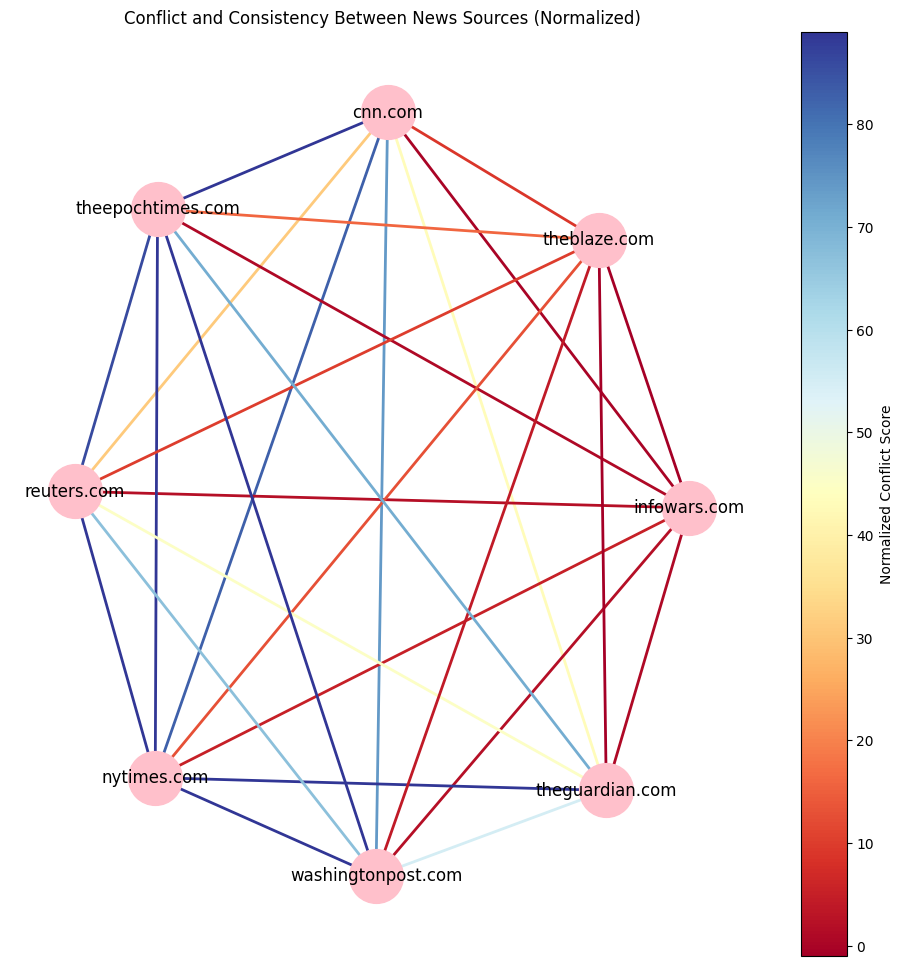

In [7]:
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()
for _, row in aggregated_df.iterrows():
    G.add_edge(row['source1'], row['source2'], weight=row['clipped_conflict_score'])

# Define colormap and normalize based on the conflict score range
cmap = plt.cm.RdYlBu
norm = mcolors.Normalize(vmin=aggregated_df['clipped_conflict_score'].min(), 
                          vmax=aggregated_df['clipped_conflict_score'].max())

# Draw the graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42, k=50, iterations=100)  # Position nodes using spring layout

# Ensure edges have weights from aggregated_df
edge_weights = [
    aggregated_df.set_index(['source1', 'source2']).loc[(u, v), 'clipped_conflict_score']
    if (u, v) in aggregated_df.set_index(['source1', 'source2']).index
    else 0
    for u, v in G.edges()
]

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='pink')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(
    G, pos, 
    edgelist=G.edges,
    edge_color=edge_weights,
    edge_cmap=cmap,
    edge_vmin=aggregated_df['clipped_conflict_score'].min(),
    edge_vmax=aggregated_df['clipped_conflict_score'].max(),
    width=2
)

# Add colorbar explicitly
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(edge_weights)  # Attach edge weights to colorbar
plt.colorbar(sm, label='Normalized Conflict Score')

# Show graph
plt.title("Conflict and Consistency Between News Sources (Normalized)")
plt.axis("off")
plt.show()

In [8]:
import pandas as pd

# Dictionary to store the sum of weights and count of edges for each node
node_weights = {}

# Iterate through edges to accumulate weights for each node
for u, v, data in G.edges(data=True):
    weight = data['weight']
    
    # Update for node u
    if u not in node_weights:
        node_weights[u] = {'weight_sum': 0, 'edge_count': 0}
    node_weights[u]['weight_sum'] += weight
    node_weights[u]['edge_count'] += 1

    # Update for node v
    if v not in node_weights:
        node_weights[v] = {'weight_sum': 0, 'edge_count': 0}
    node_weights[v]['weight_sum'] += weight
    node_weights[v]['edge_count'] += 1

# Calculate average weight for each node
average_weights = {
    node: node_data['weight_sum'] / node_data['edge_count']
    for node, node_data in node_weights.items()
}

# Convert to DataFrame for easier viewing and analysis
average_weights_df = pd.DataFrame(list(average_weights.items()), columns=['Node', 'Average Weight'])
average_weights_df.sort_values(by='Average Weight', ascending=False, inplace=True)

# Display the DataFrame
average_weights_df.to_csv('news_source_crediblity.csv', index=False)
print(average_weights_df)

                 Node  Average Weight
2         nytimes.com       65.285714
5   theepochtimes.com       63.000000
7  washingtonpost.com       54.285714
3         reuters.com       47.142857
0             cnn.com       47.000000
6     theguardian.com       43.285714
4        theblaze.com        7.142857
1        infowars.com        1.428571
